<h1> Sana Shaikh - HW4 P1 - Deep Convolutional Autoencoder for Image Denoising </h1>

### a- Import all of the libraries and tools that you need including the layers for your network:

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Convolution2D, MaxPooling2D, Conv2DTranspose

from keras.utils import np_utils

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### b- Import the mnist dataset and split it into testing and training:

In [2]:
from keras.datasets import mnist

# since we're using Unsupervised Autoencoder, we don't use the labels y_train and y_test
(X_train,_), (X_test,_) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# simply scale the features to the range of [0,1]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
print(X_train[0,:])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
#Reshape each image pixel and format appropriately: GIVES AN ERROR IN GOOGLE COLAB!!!!!!!!!!!!!!!!!!!!

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### c- Add Random noise to all your training and testing samples, and save them as new datasets: 

In [8]:
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

### d- Plot some of your samples with noise and without noise and compare them: 

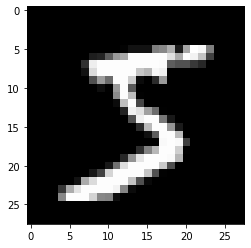

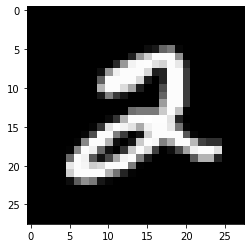

In [9]:
%matplotlib inline

#samples without noise
imgplot = plt.imshow(X_train[0],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[5],cmap=plt.cm.gray)
plt.show()

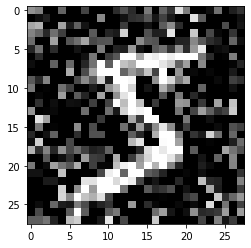

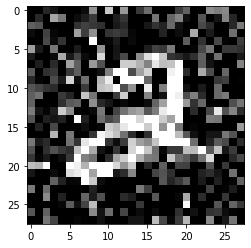

In [10]:
#samples with noise
imgplot = plt.imshow(noisy_X_train[0],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(noisy_X_train[5],cmap=plt.cm.gray)
plt.show()

### e- Now, we want to create our deep convolutional autoencoder for de-noising the images: 

In [11]:
#The autoencoder includes an Encoder part that compresses the input, and a Decoder part that reconstructs the data

input_image = Input(shape=(28, 28, 1), name="Input")

#Encoder:
encode = Convolution2D(32, (3,3), activation="relu", padding="same", name="First_Encode")(input_image)
encode = MaxPooling2D((2,2), padding="same")(encode)
encode = Convolution2D(32, (3,3), activation="relu", padding="same", name="Second_Encode")(encode)
encode = MaxPooling2D((2,2), padding="same")(encode)

# encoder = Model(input_img, encode)?

#Decoder: encoded layer goes to the decoder as input in the first layer
decode = Conv2DTranspose(32, (3,3), strides=2, activation="relu", padding="same", name="First_Decode")(encode)
decode = Conv2DTranspose(32, (3,3), strides=2, activation="relu", padding="same", name="Second_Decode")(decode)
decode = Convolution2D(1, (3,3), activation="sigmoid", padding="same", name="Final")(decode)


autoencoder = Model(input_image, decode)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
First_Encode (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Second_Encode (Conv2D)       (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
First_Decode (Conv2DTranspos (None, 14, 14, 32)        9248      
_________________________________________________________________
Second_Decode (Conv2DTranspo (None, 28, 28, 32)        9248  

### f- Compile the model with loss='binary_crossentropy', optimizer='adam'

In [12]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#autoencoder.summary()

### g- Train the model ONLY using the training data. Remember, we don’t use y (label) here. 
### Our input will be noisy_X_train and output will be X_train (reconstruction). We use the batch_size=128 and epochs=5:

In [13]:
history = autoencoder.fit(noisy_X_train, X_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 54s 112ms/step - loss: 0.2979 - accuracy: 0.7930
Epoch 2/5
469/469 [==============================] - 51s 108ms/step - loss: 0.1032 - accuracy: 0.8126
Epoch 3/5
469/469 [==============================] - 54s 115ms/step - loss: 0.0975 - accuracy: 0.8133
Epoch 4/5
469/469 [==============================] - 74s 157ms/step - loss: 0.0949 - accuracy: 0.8134
Epoch 5/5
469/469 [==============================] - 74s 158ms/step - loss: 0.0932 - accuracy: 0.8138


### h- Now, we make a prediction on our noisy testing set to de-noise it. The output of our prediction will be the de-noised version of our noisy testing set:

In [14]:
prediction = autoencoder.predict(noisy_X_test)

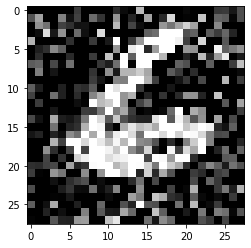

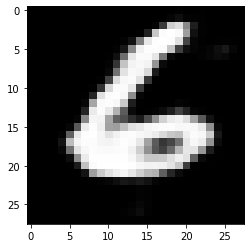

In [15]:
#display a noisy testing sample
imgplot = plt.imshow(noisy_X_test[9999],cmap=plt.cm.gray)
plt.show()
#display the same de-noised testing sample
imgplot = plt.imshow(prediction[9999],cmap=plt.cm.gray)
plt.show()

### i- It is time to see the Magic! We plot 10 random images of our testing set before and after de-noising to see how amazing our model is in cleaning noisy images.

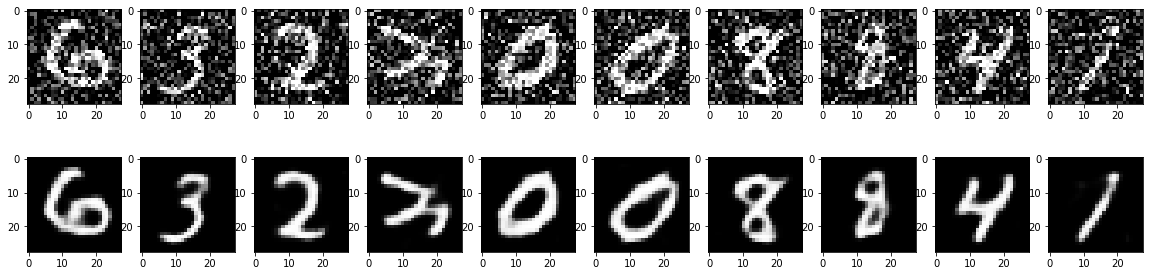

In [17]:
#display random noisy images from our testing set and their respective de-noised images below them

same_elem = np.random.randint(len(noisy_X_test), size = 10)
noisy = noisy_X_test[same_elem]
predict = prediction[same_elem]

plt.figure(figsize = (20, 5))

for i, (img1, img2) in enumerate(zip(noisy, predict)):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(img1.reshape(28, 28, 1))
    plt.gray()
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(img2.reshape(28, 28, 1))
    plt.gray()
plt.show()